# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pathlib import Path

RAW_DATA = Path('/Users/wyao/Downloads/CA.GOV/state-buildings-sustainability-metrics-2014.csv')

In [2]:
raw_df = pd.read_csv(RAW_DATA)
# raw_df.info()
# raw_df.nunique()

In [3]:
drop = ['Department Name',
        'Property Id',
        'Property Name',
        'Year Ending', 
        'Address 1', 
        'City', 
        'State/Province',
        'Propane Use (kBtu)', 
        'Location'
       ]
raw_df.drop(columns=drop, inplace=True)

rename = {'Department': 'dept', 'Postal Code': 'ps_code',
          'Year Built': 'age',
          'Property GFA - EPA Calculated (Buildings) (ft²)': 'gfa',
          'Primary Property Type - Self Selected': 'type',
          'Electricity Use  Generated from Onsite Renewable Systems and Used Onsite (kWh)': 'energy_use_renewable_kwh',
          'Electricity Use - Grid Purchase (kWh)': 'energy_use_purchase_kwh',
          'Natural Gas Use (therms)': 'gas_use_therms',
#           'Propane Use (kBtu)': 'propane_use_kbtu', 
          'Water Use (All Water Sources) (kgal)': 'water_use_kgal',
          'Percent of Electricity that is Green Power': 'energy_green_power_percent',
          'Green Power - Onsite and Offsite (kWh)': 'green_power_kwh',
          'Site Energy Use (kBtu)': 'site_energy_use_kbtu',
          'ENERGY STAR Score': 'energy_star_score',
          'LEED Certified': 'leed'
         }

raw_df.rename(columns=rename, inplace=True)

# convert to categorical column
raw_df['dept'] = raw_df.loc[:,'dept'].astype('category')
raw_df['ps_code'] = raw_df.loc[:,'ps_code'].astype('category')
raw_df['type'] = raw_df.loc[:,'type'].astype('category')
raw_df['leed'] = raw_df.loc[:,'leed'].astype('category')


# # select top type, remove number of buildings less 3
# raw_df = raw_df.loc[raw_df['type'].map(raw_df['type'].value_counts()) >= 3]

In [4]:
# convert percentage string to float
raw_df['energy_green_power_percent'] = raw_df.loc[:, 'energy_green_power_percent'].str.strip('%').astype(float)/100
# convert built year to age and filter outliers
raw_df['age'] = 2020 - raw_df.loc[:, 'age']
raw_df = raw_df.loc[(raw_df['age']>=0) & (raw_df['age']<200),:]

raw_df.reset_index(drop=True, inplace=True)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   dept                        1715 non-null   category
 1   ps_code                     1715 non-null   category
 2   gfa                         1374 non-null   float64 
 3   type                        1715 non-null   category
 4   age                         1715 non-null   int64   
 5   energy_use_renewable_kwh    75 non-null     float64 
 6   energy_use_purchase_kwh     1296 non-null   float64 
 7   gas_use_therms              650 non-null    float64 
 8   water_use_kgal              1297 non-null   float64 
 9   energy_green_power_percent  1289 non-null   float64 
 10  green_power_kwh             1301 non-null   float64 
 11  site_energy_use_kbtu        1164 non-null   float64 
 12  energy_star_score           228 non-null    float64 
 13  leed              

In [6]:
# raw_df.drop(columns=['energy_use_renewable_kwh', 'gas_use_therms'],inplace=True)
raw_df_num = raw_df.select_dtypes(include = ['float64', 'int64'])
# for col in raw_df_num:
#     fig, ax = plt.subplots(figsize=(8,8))
#     ax.hist(x=raw_df_num[col], align='mid',bins=20)
#     plt.title(col)
#     plt.tight_layout()
#     plt.show()

raw_df_cat = raw_df.select_dtypes(include = ['category'])
raw_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   dept     1715 non-null   category
 1   ps_code  1715 non-null   category
 2   type     1715 non-null   category
 3   leed     46 non-null     category
dtypes: category(4)
memory usage: 57.9 KB


In [7]:
raw_df['dept'].value_counts()

CAL TRANS     442
CAL FIRE      314
DPR           203
CHP           107
CMD           103
DMV            94
CDFW           91
DGS            52
DAA            48
CADA           46
CDCR           43
EDD            29
DWR            28
HCD            24
CDFA           23
CDVA           10
DOJ             8
DDS             7
CSC             5
CLC             5
DSH             5
CAL PERS        4
CDE             4
CDPH            3
CCC             3
DCA             2
CAL PIA         2
CAL EXPO        1
CAAM            1
CAL OES         1
SMMC            1
CAL STRS        1
CAL TECH        1
SLC             1
DOC             1
DOR             1
ARB             1
Name: dept, dtype: int64

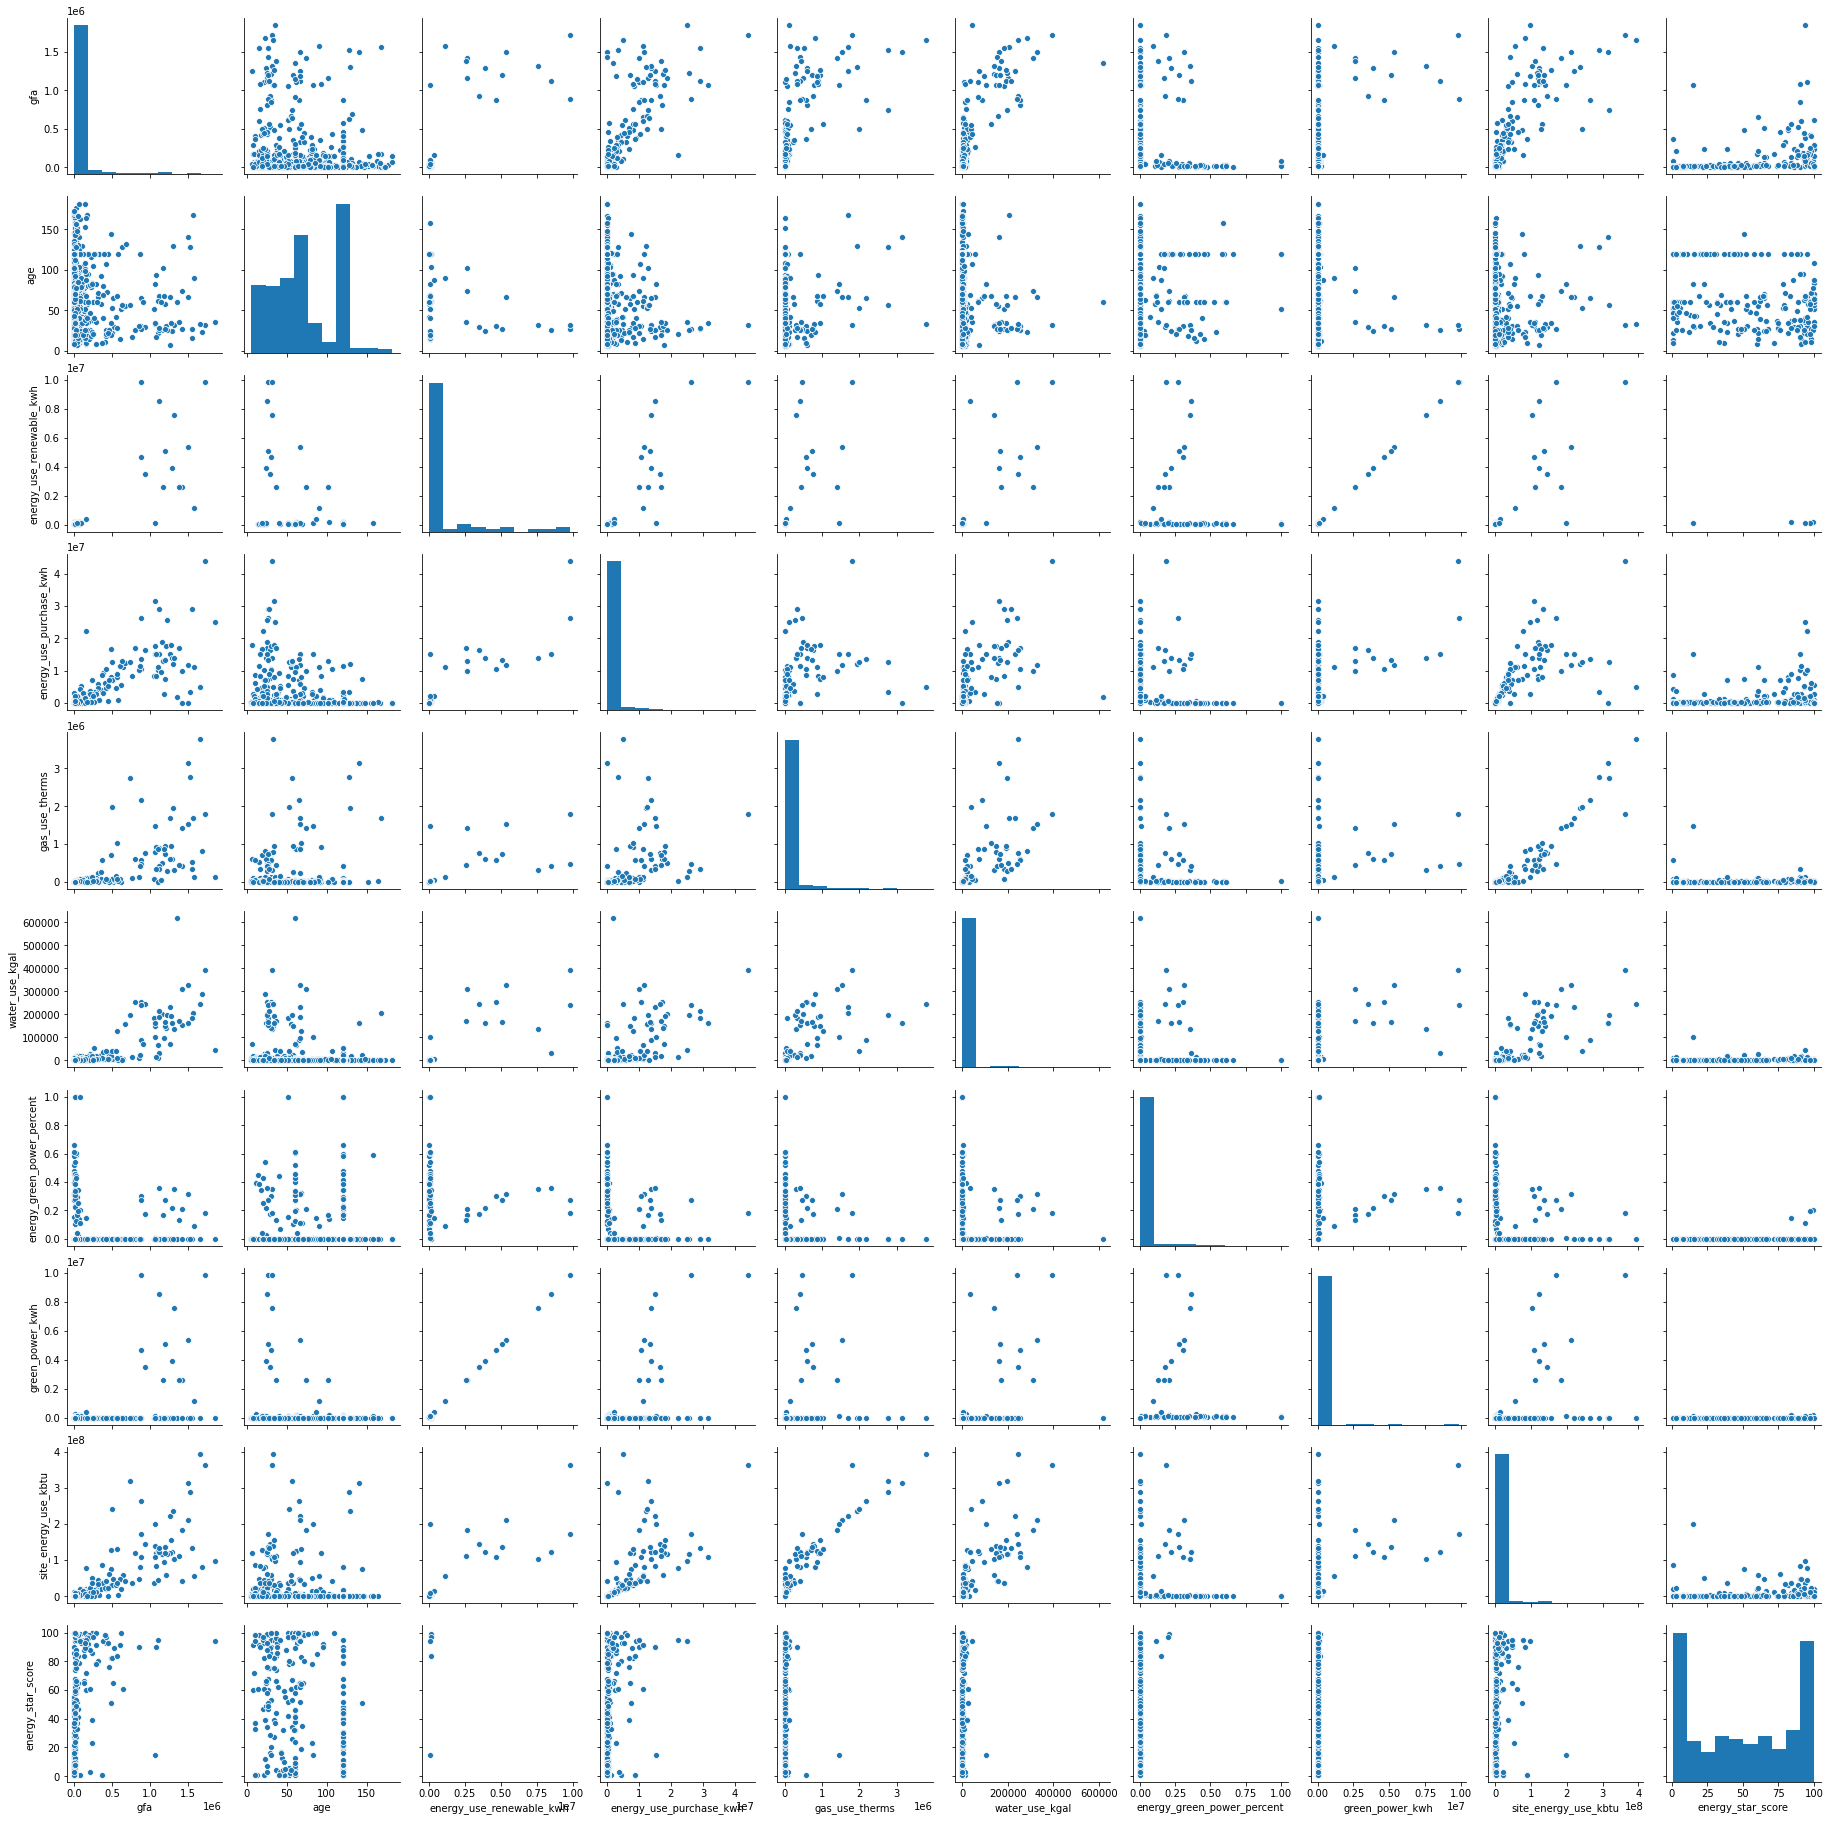

In [8]:
pp = sns.pairplot(raw_df_num)

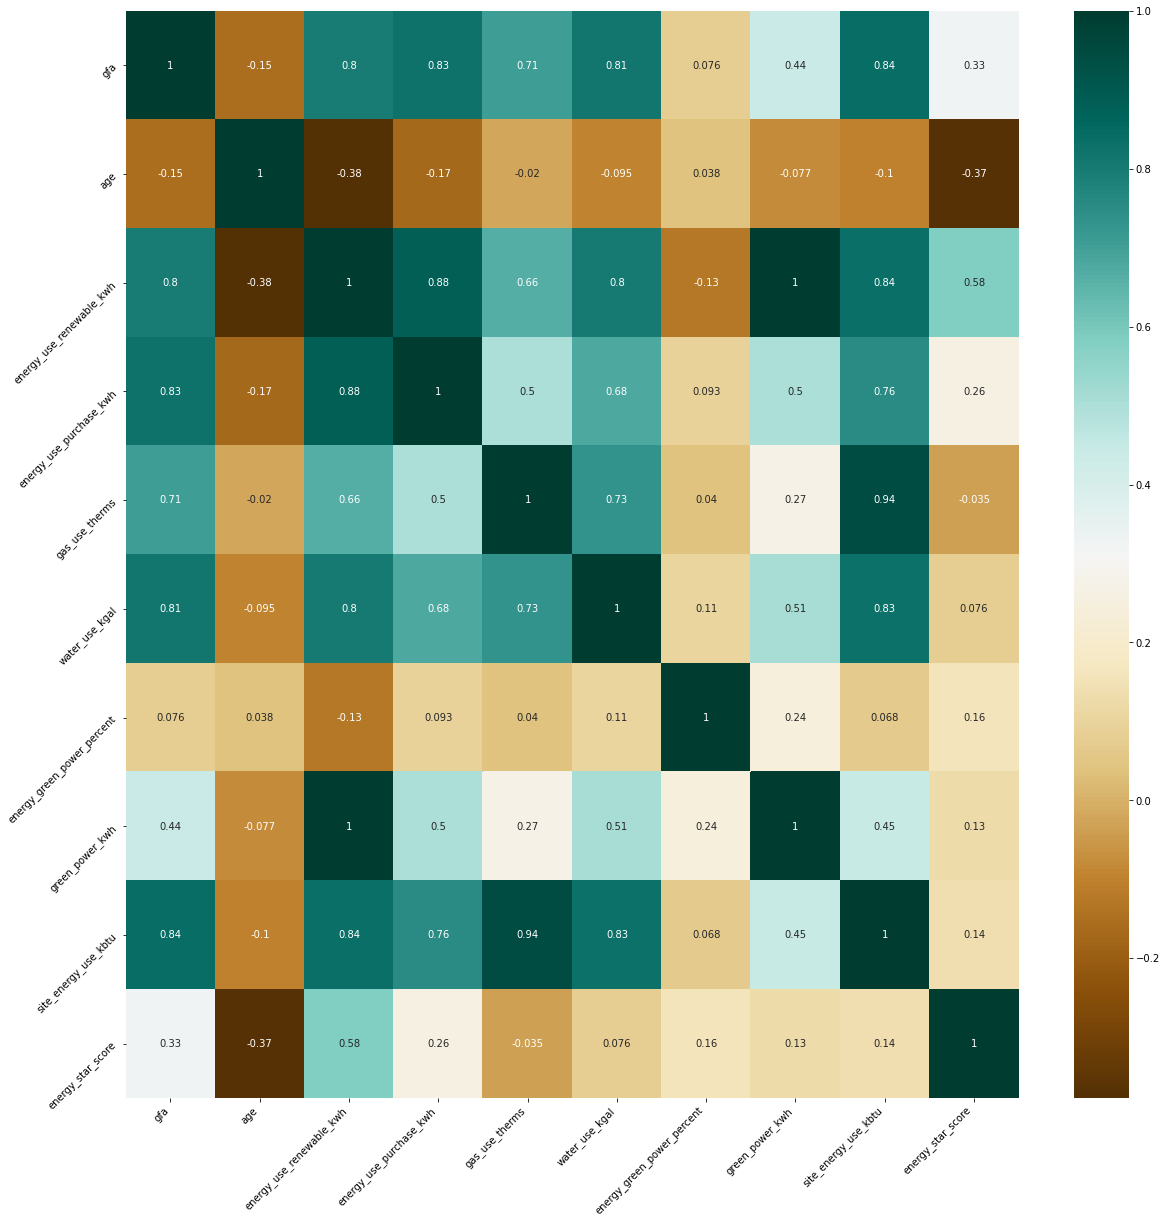

In [9]:
plt.figure(figsize=(20,20))
c= raw_df.corr()
hm = sns.heatmap(c,cmap="BrBG",annot=True)
# c
hm.set_xticklabels(hm.get_xticklabels(), rotation=45, horizontalalignment='right');
hm.set_yticklabels(hm.get_yticklabels(), rotation=45, horizontalalignment='right');

In [10]:
raw_df['green_power_kwh'].describe()

count    1.301000e+03
mean     5.454127e+04
std      5.840003e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.819362e+06
Name: green_power_kwh, dtype: float64

In [11]:
raw_df['site_energy_use_kbtu'].describe()

count    1.164000e+03
mean     7.691245e+06
std      3.375314e+07
min      0.000000e+00
25%      1.141359e+05
50%      3.441214e+05
75%      1.000957e+06
max      3.941173e+08
Name: site_energy_use_kbtu, dtype: float64

In [12]:
num_col_list = raw_df_num.drop(columns=['gfa', 'age']).columns

print(num_col_list)

Index(['energy_use_renewable_kwh', 'energy_use_purchase_kwh', 'gas_use_therms',
       'water_use_kgal', 'energy_green_power_percent', 'green_power_kwh',
       'site_energy_use_kbtu', 'energy_star_score'],
      dtype='object')


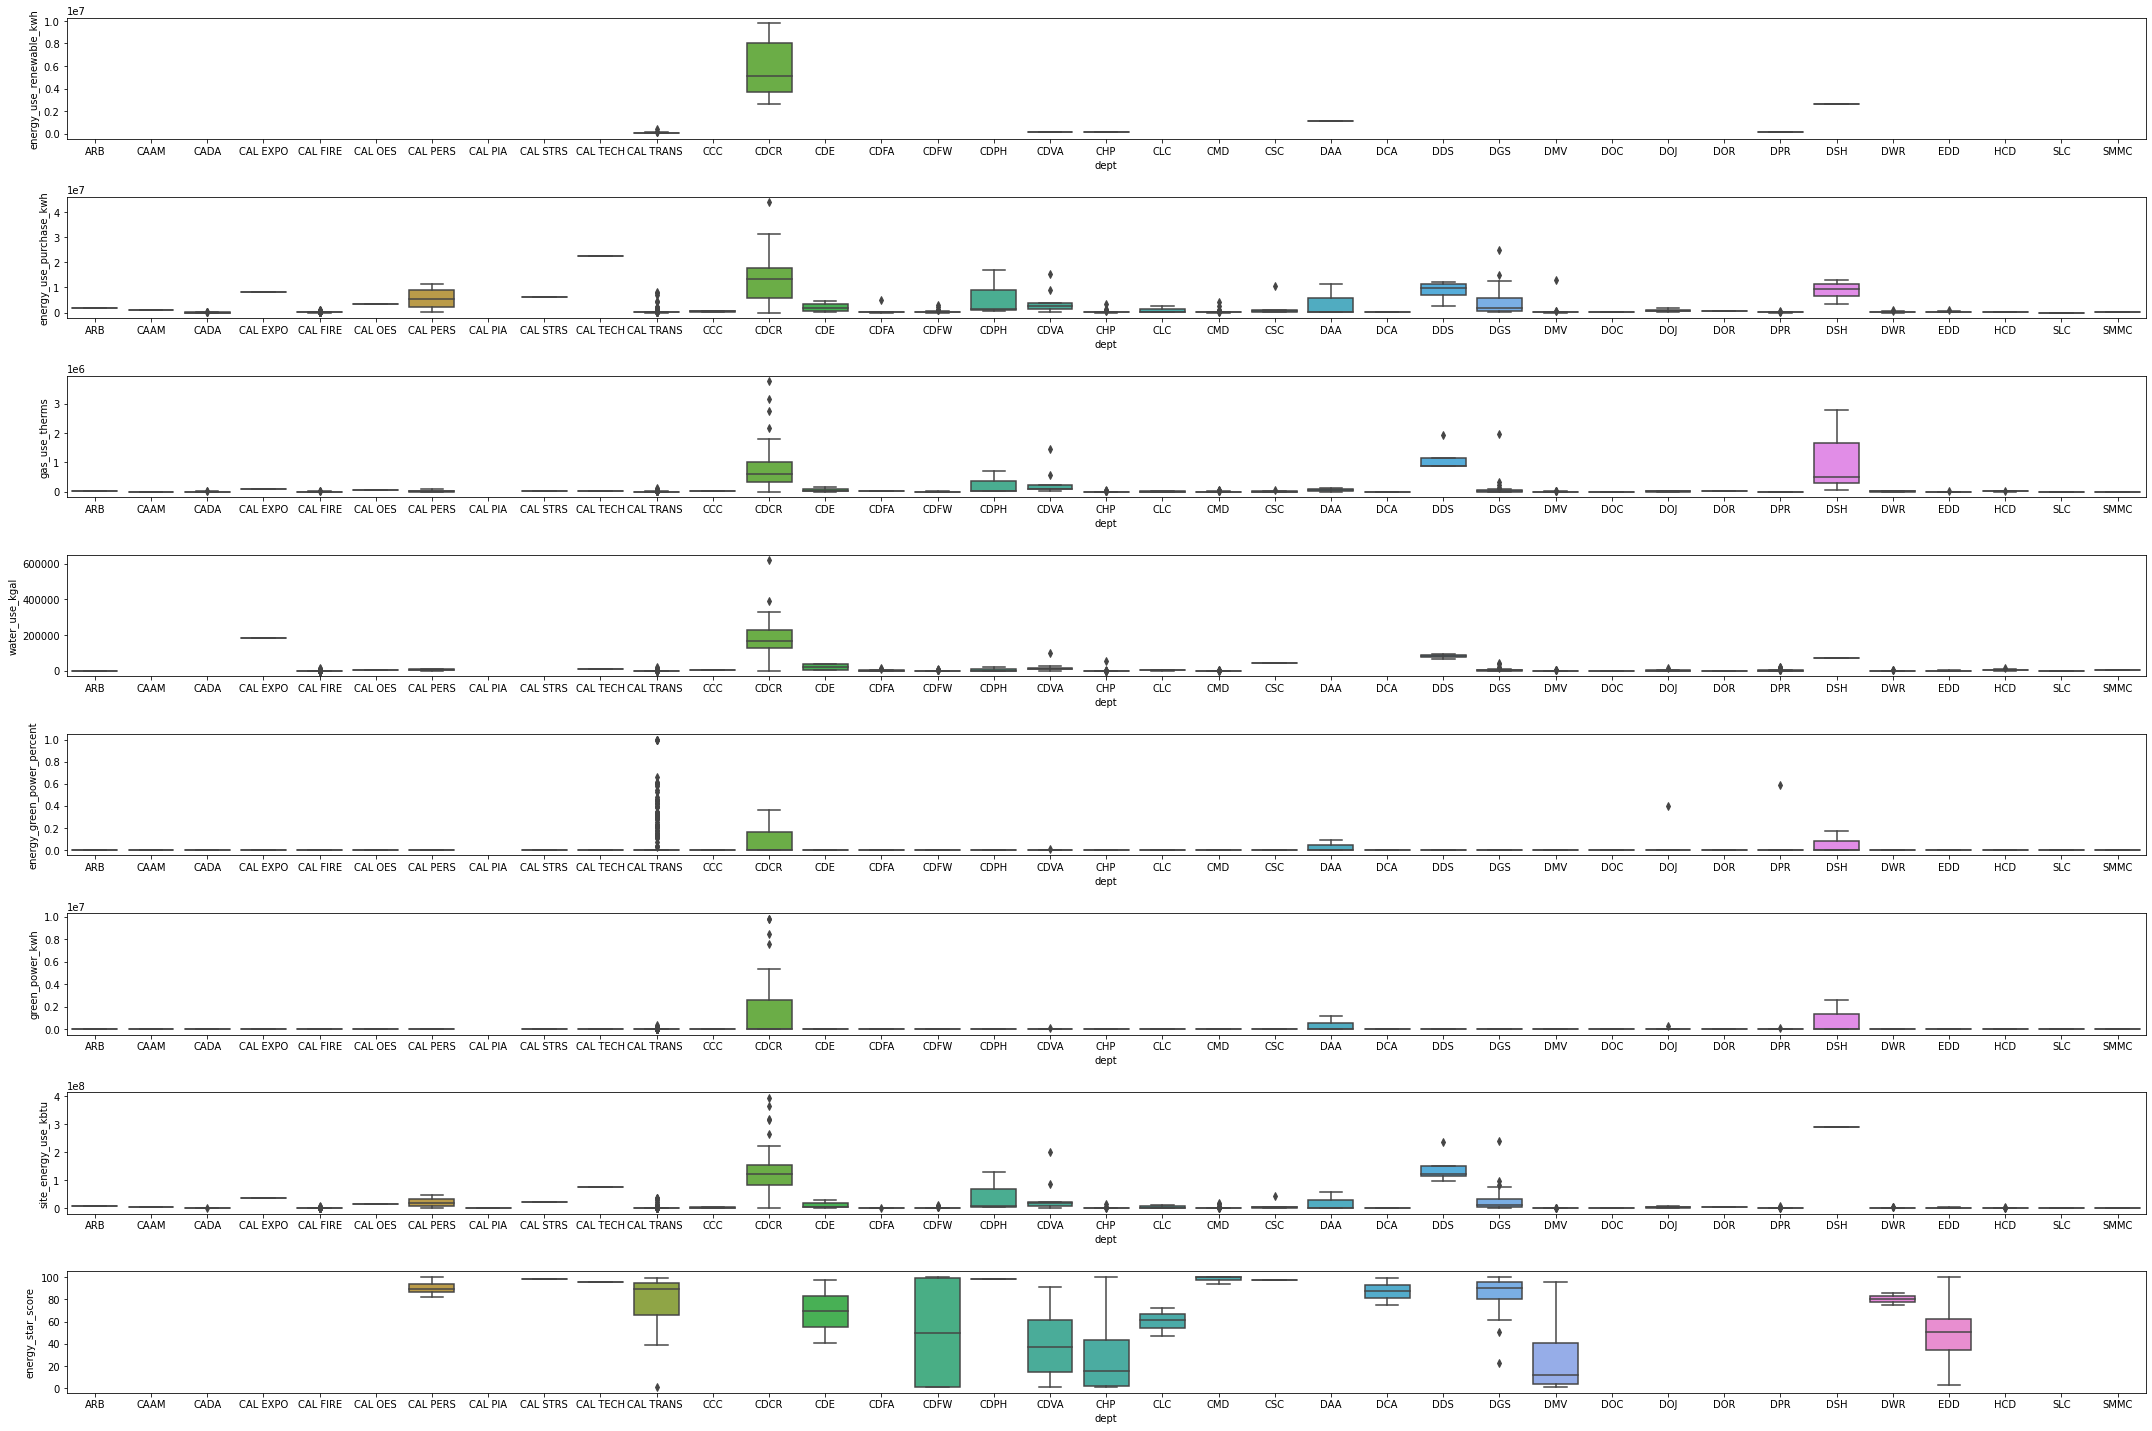

In [13]:
fig, axes = plt.subplots(nrows=len(num_col_list), ncols=1, figsize=(30,20),sharex=True)

for i, col in enumerate(num_col_list):
    sorted_nb = raw_df.groupby(['dept'])[col].median()#.head(10)#.sort_values()
    sns.boxplot(x=raw_df['dept'], y=raw_df[col], order=list(sorted_nb.index),ax=axes[i]);

    axes[i].tick_params(axis='both', which='both',labelbottom=True)

    for tick in axes[i].get_xticklabels():
        tick.set_visible(True)
    
plt.tight_layout()
plt.show()

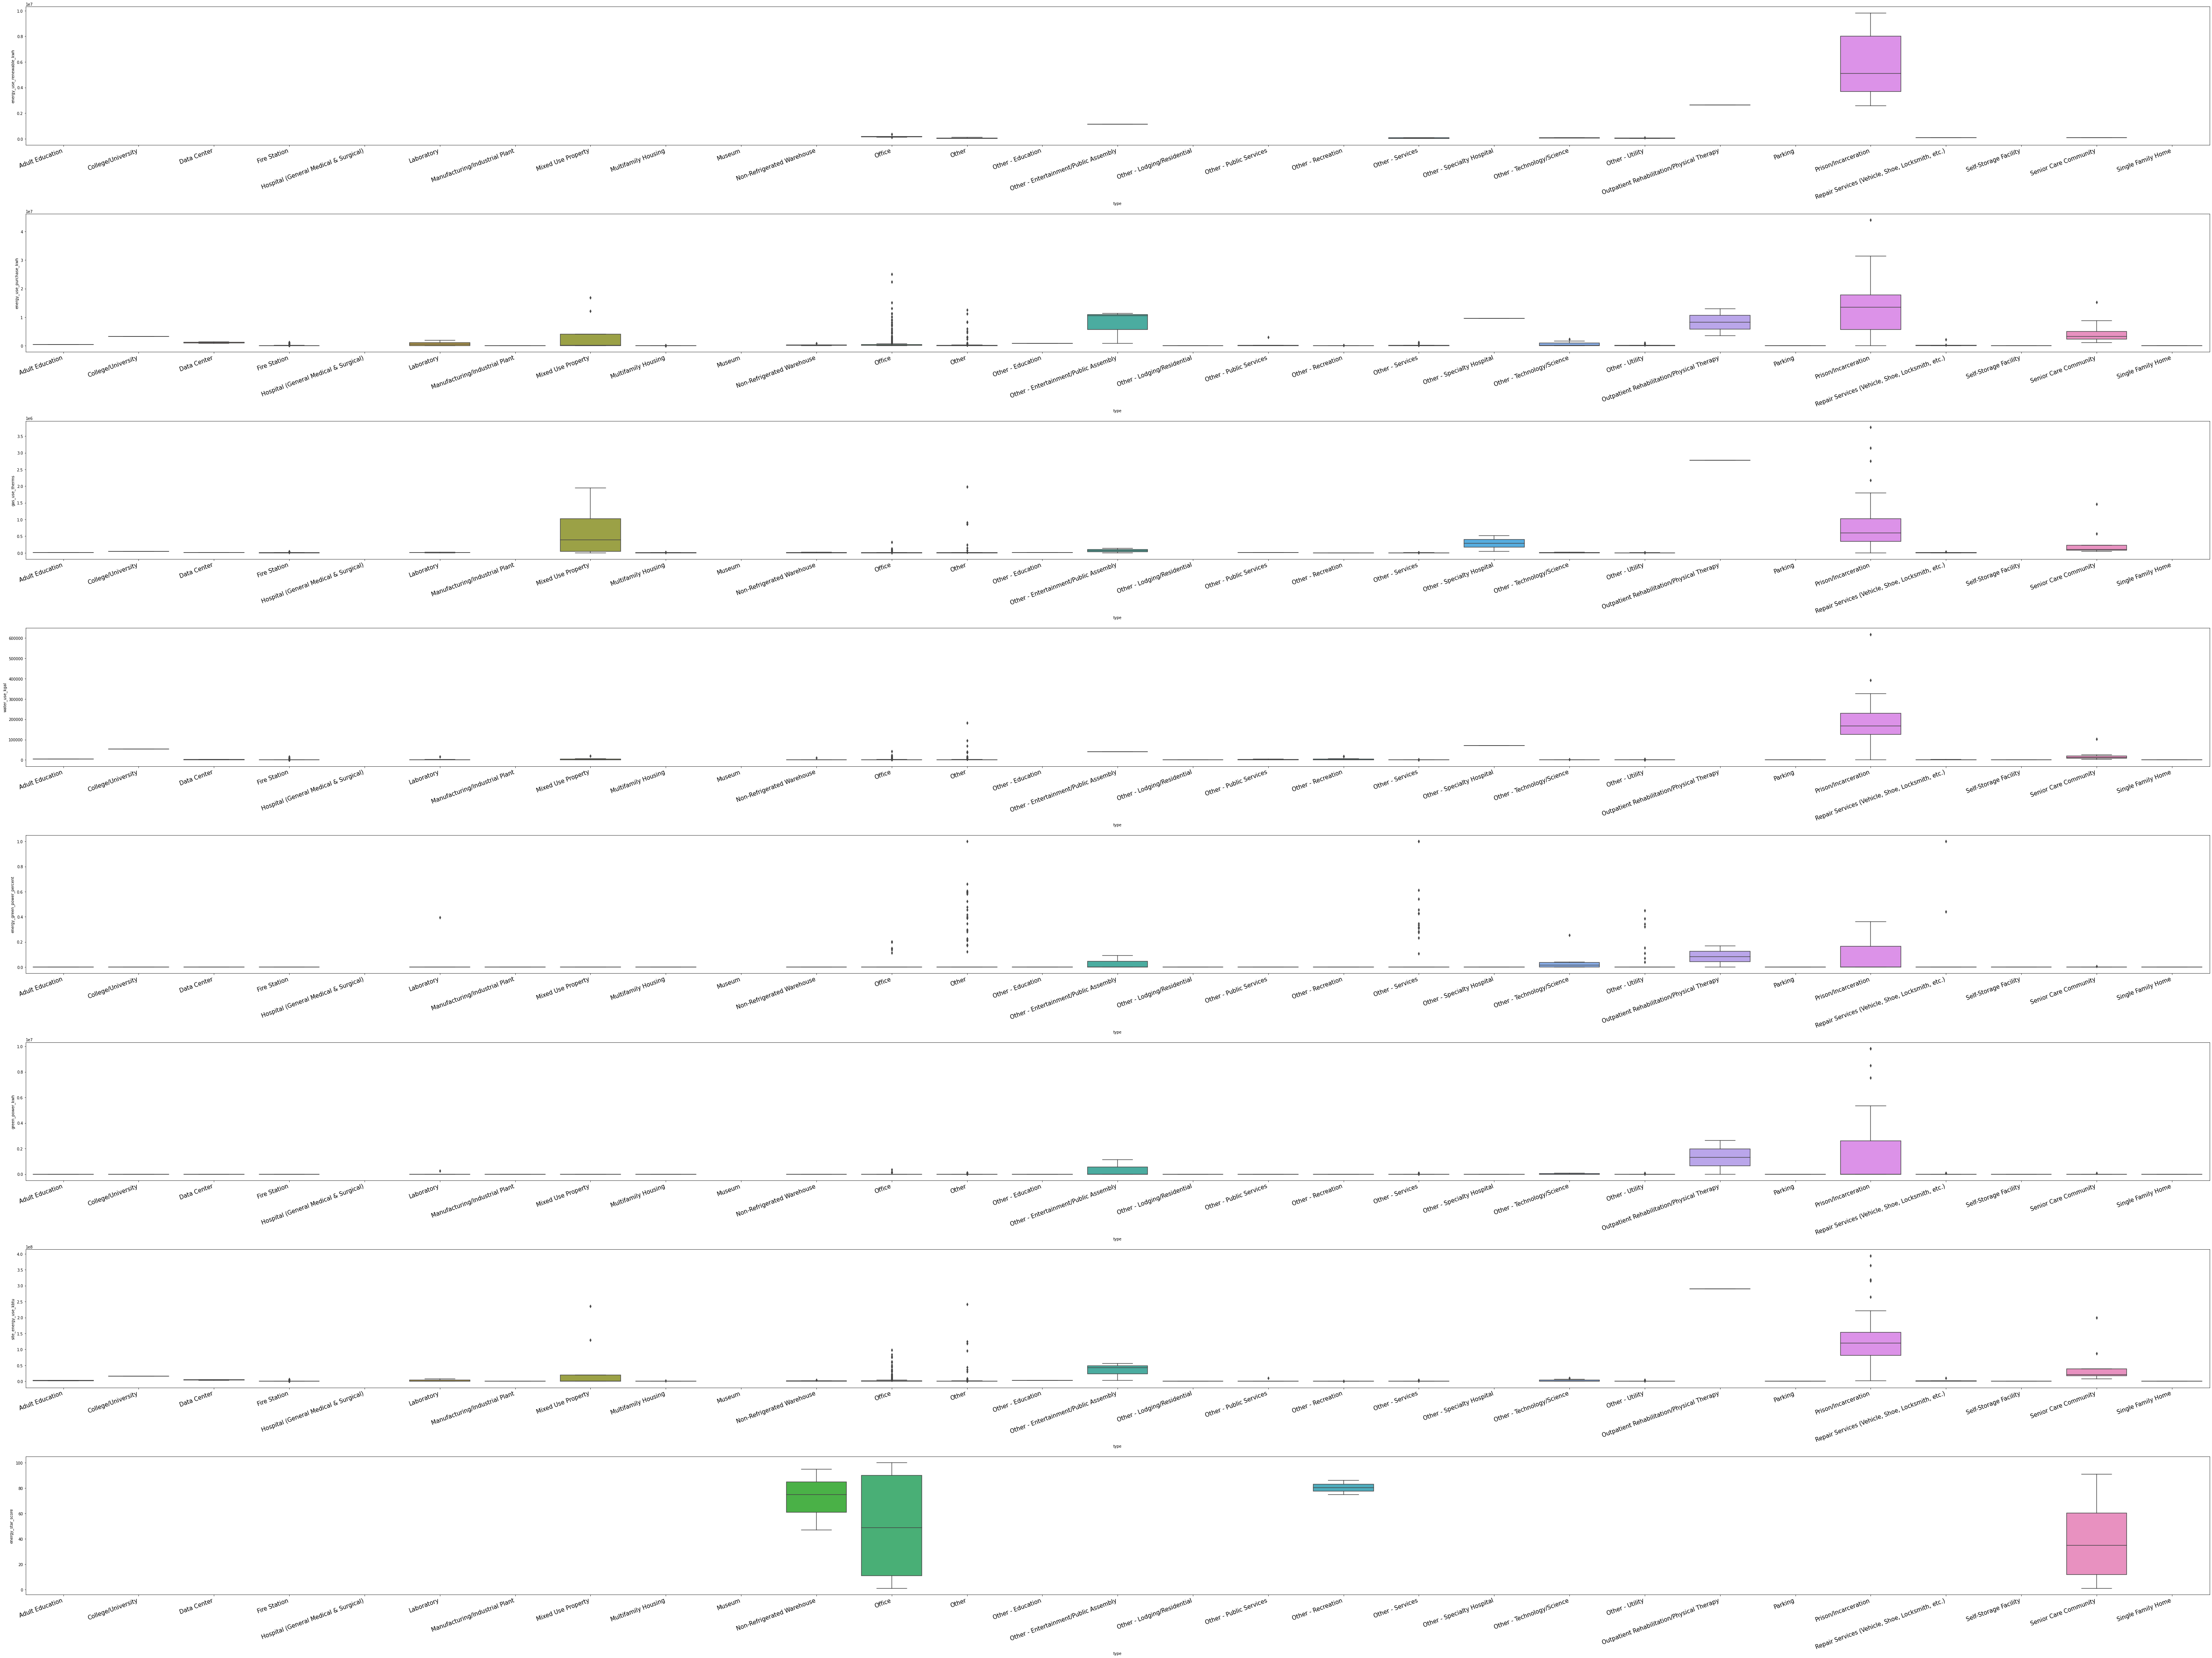

In [14]:
fig, axes = plt.subplots(nrows=len(num_col_list), ncols=1, figsize=(80,60),sharex=True)

for i, col in enumerate(num_col_list):
    sorted_nb = raw_df.groupby(['type'])[col].median()#.head(10)#.sort_values()
    sns.boxplot(x=raw_df['type'], y=raw_df[col], order=list(sorted_nb.index),ax=axes[i]);
    
    axes[i].tick_params(axis='both', which='both',labelbottom=True)
    
    for tick in axes[i].get_xticklabels():
        tick.set_visible(True)
    
    axes[i].set_xticklabels(axes[i].get_xticklabels(), 
                            rotation=20, 
                            horizontalalignment='right',
                            fontsize=15);
    
plt.tight_layout()
plt.show()

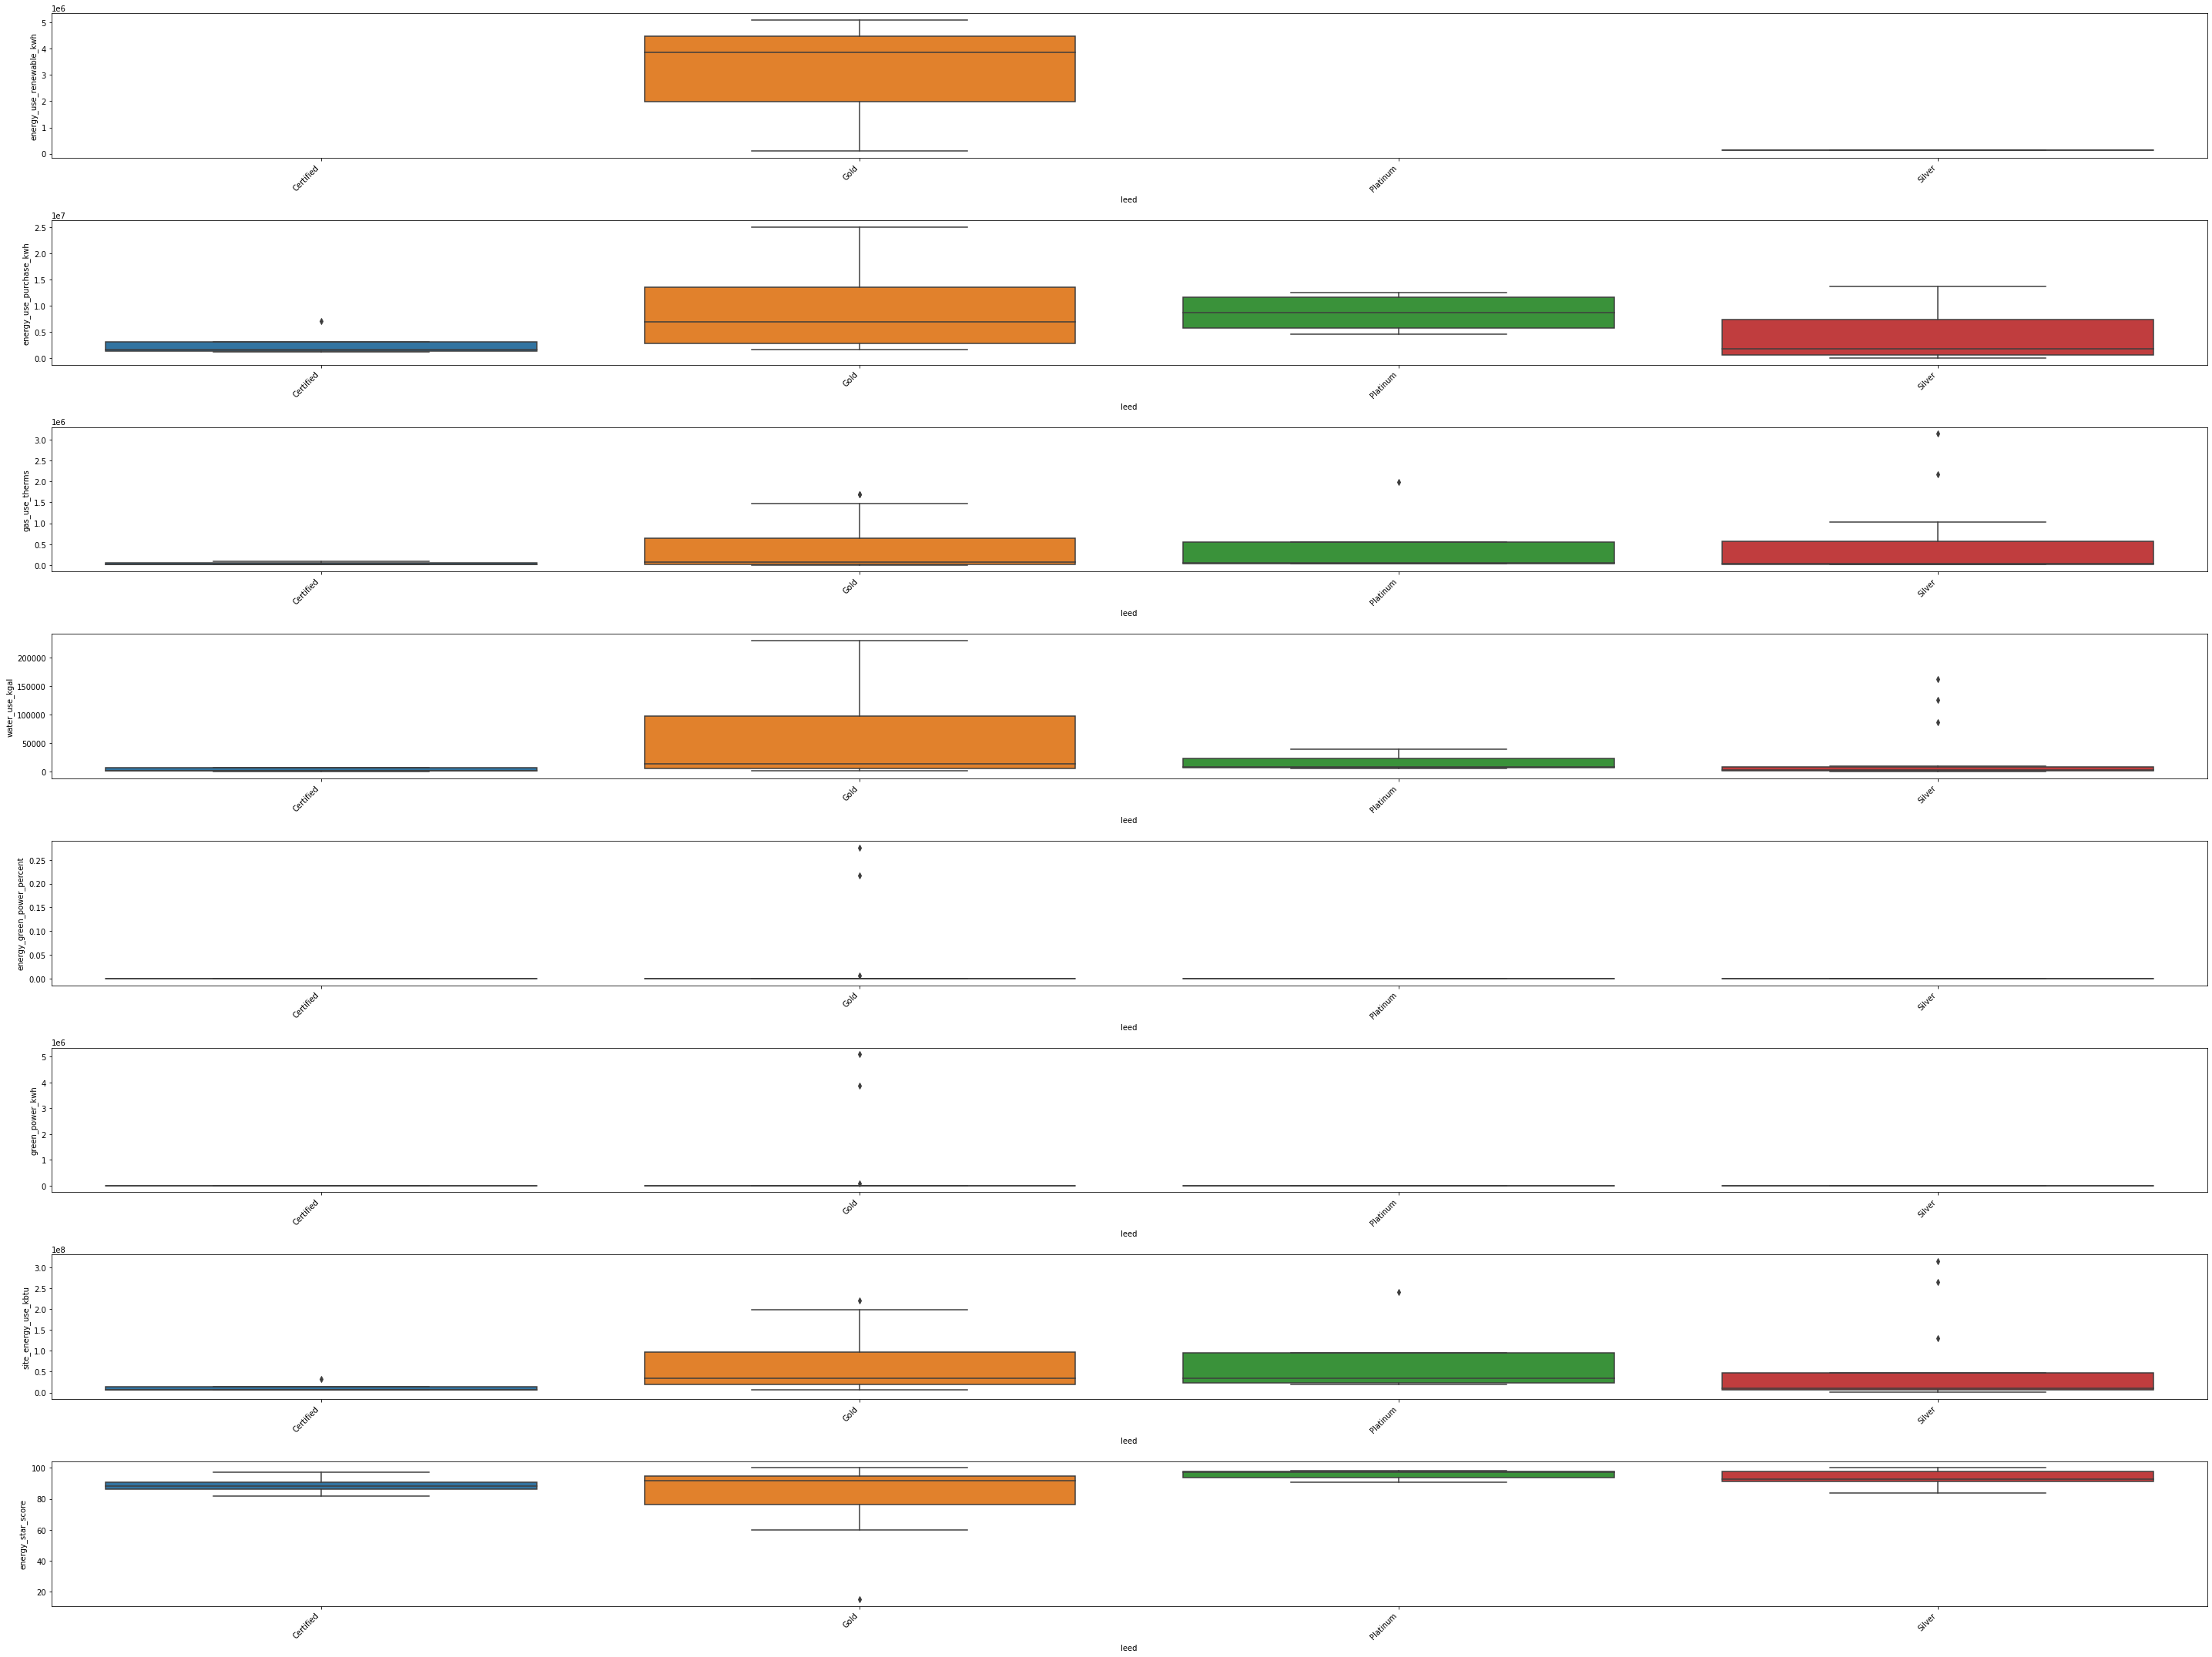

In [15]:
fig, axes = plt.subplots(nrows=len(num_col_list), ncols=1, figsize=(40,30),sharex=True)

for i, col in enumerate(num_col_list):
    sorted_nb = raw_df.groupby(['leed'])[col].median()#.head(10)#.sort_values()
    sns.boxplot(x=raw_df['leed'], y=raw_df[col], order=list(sorted_nb.index),ax=axes[i]);
    
    axes[i].tick_params(axis='both', which='both',labelbottom=True)
    
    for tick in axes[i].get_xticklabels():
        tick.set_visible(True)
    
    axes[i].set_xticklabels(axes[i].get_xticklabels(), 
                            rotation=45, 
                            horizontalalignment='right');
    
plt.tight_layout()
plt.show()

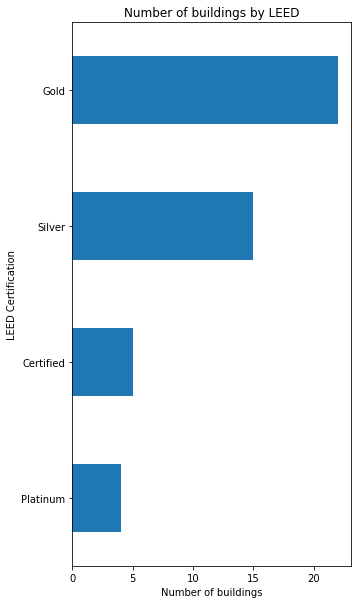

In [16]:
# raw_df['dept'].value_counts().nlargest(20).sort_values(ascending=True).plot.barh(figsize=(5,10))
# plt.title("Number of buildings by department")
# plt.ylabel('Department')
# plt.xlabel('Number of buildings');

# raw_df['ps_code'].value_counts().nlargest(20).sort_values(ascending=True).plot.barh(figsize=(5,10))
# plt.title("Number of buildings by zip code")
# plt.ylabel('Zip Code')
# plt.xlabel('Number of buildings');

# raw_df['type'].value_counts().nlargest(8).sort_values(ascending=True).plot.barh(figsize=(5,10))
# plt.title("Number of buildings by Type")
# plt.ylabel('Type of building')
# plt.xlabel('Number of buildings');

raw_df['leed'].value_counts().nlargest(8).sort_values(ascending=True).plot.barh(figsize=(5,10))
plt.title("Number of buildings by LEED")
plt.ylabel('LEED Certification')
plt.xlabel('Number of buildings');

# raw_df['age'].plot(kind='box',figsize=(5,10))
# plt.title("Distribution of Age")
# plt.ylabel('Age of buildings')
# plt.xlabel('');

# raw_df['gfa'].plot(kind='hist',figsize=(5,10))
# plt.title("Histogram of floor area")
# plt.ylabel('Number of buildings')
# plt.xlabel('gfa');

# raw_df.loc[(raw_df['age']>=0) & (raw_df['age']<200),'age'].plot(kind='box',figsize=(5,10))
# plt.title("Histogram of Age")
# plt.ylabel('Number of buildings')
# plt.xlabel('');

# raw_df.loc[(raw_df['age']>=0) & (raw_df['age']<200),'age'].plot(kind='hist',figsize=(5,10), bins=20)
# plt.title("Histogram of Age")
# plt.ylabel('Number of buildings')
# plt.xlabel('');

# raw_df['energy_use_renewable_kwh'].plot(kind='hist',figsize=(5,10), 
# #                                         bins=6, 
# #                                         align='mid'
#                                        )
# plt.title("Histogram of energy_use_renewable_kwh")
# plt.ylabel('Number of buildings')
# plt.xlabel('');

# raw_df['energy_use_purchase_kwh'].plot(kind='hist',figsize=(5,10), 
# #                                         bins=6, 
# #                                         align='mid'
#                                       )
# plt.title("Histogram of energy_use_purchase_kwh")
# plt.ylabel('Distribution')
# plt.xlabel('');

# raw_df['water_use_kgal'].plot(kind='hist',figsize=(5,10), 
# #                                         bins=6, 
# #                                         align='mid'
#                                       )
# plt.title("Histogram of water_use_kgal")
# plt.ylabel('Distribution')
# plt.xlabel('');

# raw_df['site_energy_use_kbtu'].plot(kind='hist',figsize=(5,10), 
# #                                         bins=6, 
# #                                         align='mid'
#                                       )
# plt.title("Histogram of site_energy_use_kbtu")
# plt.ylabel('Distribution')
# plt.xlabel('');

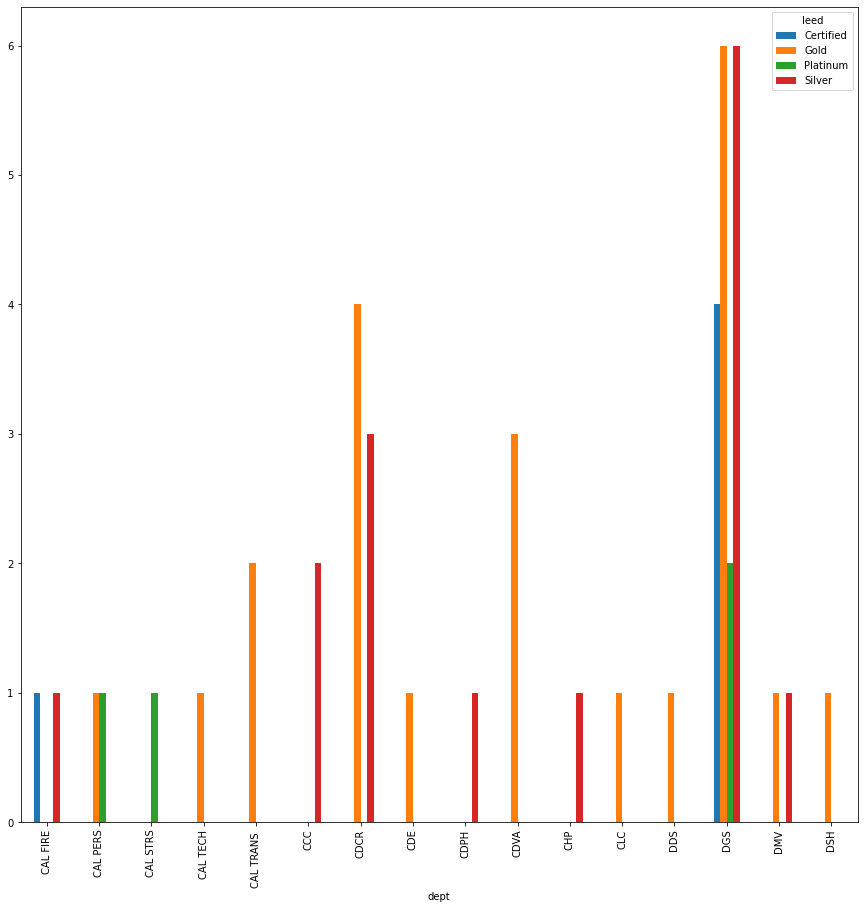

In [17]:
# grouped = raw_df.groupby(['dept', 'leed'])
# grouped.size()

dept_leed_table = pd.crosstab(index=raw_df["dept"], 
                                  columns=raw_df["leed"])
dept_leed_table.plot(
    kind="bar", 
    figsize=(15,15),
    stacked=False);

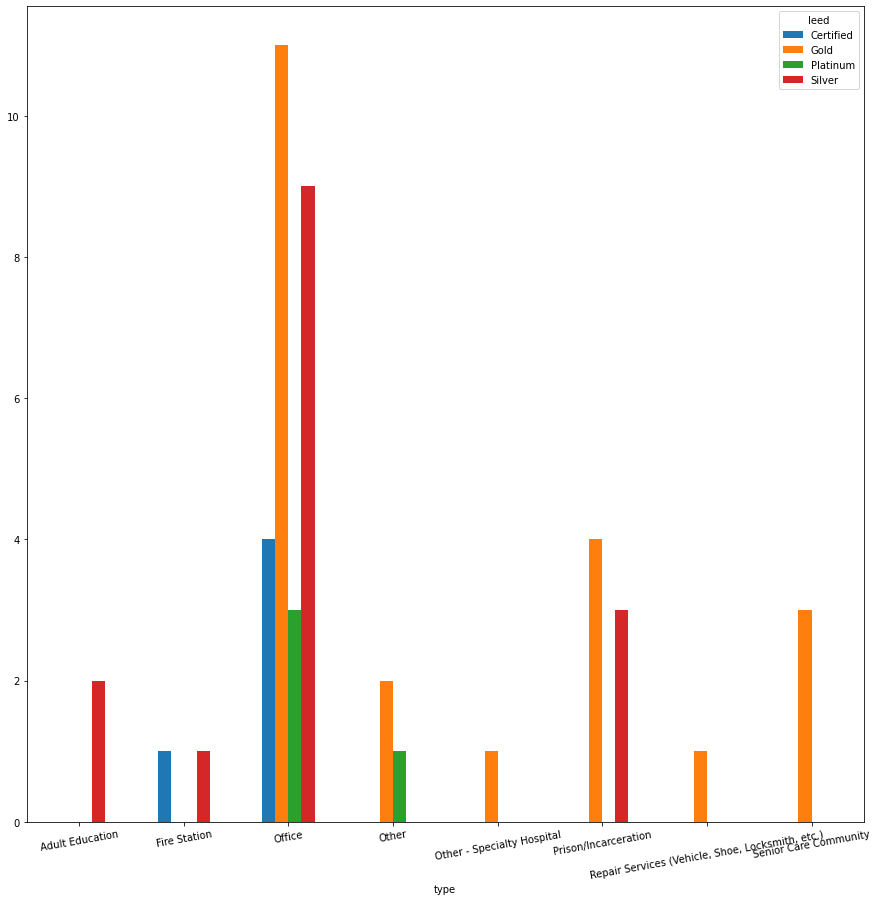

In [18]:
type_leed_table = pd.crosstab(
    index=raw_df["type"], 
    columns=raw_df["leed"])
type_leed_table.plot(
    kind="bar", 
    figsize=(15,15),
    stacked=False,
    rot=10);

# Missing Values

In [19]:
raw_df.columns

Index(['dept', 'ps_code', 'gfa', 'type', 'age', 'energy_use_renewable_kwh',
       'energy_use_purchase_kwh', 'gas_use_therms', 'water_use_kgal',
       'energy_green_power_percent', 'green_power_kwh', 'site_energy_use_kbtu',
       'energy_star_score', 'leed'],
      dtype='object')

In [20]:
# fill missing value of floor area by group mean
raw_df['gfa'] = raw_df['gfa'].fillna(raw_df.groupby(by=['dept','type'])['gfa'].transform(lambda x: np.nanmean(x)))
raw_df['energy_use_purchase_kwh'] = raw_df['energy_use_purchase_kwh'].fillna(raw_df.groupby(by=['dept','type'])['energy_use_purchase_kwh'].transform(lambda x: np.nanmean(x)))
raw_df['energy_use_purchase_kwh'].fillna(0, inplace=True)

raw_df['gas_use_therms'] = raw_df['gas_use_therms'].fillna(raw_df.groupby(by=['dept','type'])['gas_use_therms'].transform(lambda x: np.nanmean(x)))
raw_df['gas_use_therms'].fillna(0, inplace=True)

raw_df['water_use_kgal'] = raw_df['water_use_kgal'].fillna(raw_df.groupby(by=['dept','type'])['water_use_kgal'].transform(lambda x: np.nanmean(x)))
raw_df['water_use_kgal'].fillna(0, inplace=True)

raw_df['site_energy_use_kbtu'] = raw_df['site_energy_use_kbtu'].fillna(raw_df.groupby(by=['dept','type'])['site_energy_use_kbtu'].transform(lambda x: np.nanmean(x)))
raw_df['site_energy_use_kbtu'].fillna(0, inplace=True)
# fill missing value with 0
raw_df['energy_use_renewable_kwh'] = raw_df.loc[:, 'energy_use_renewable_kwh'].fillna(0)
raw_df['energy_green_power_percent'] = raw_df.loc[:, 'energy_green_power_percent'].fillna(0)
raw_df['green_power_kwh'] = raw_df.loc[:, 'green_power_kwh'].fillna(0)

/Users/wyao/GitLab/VirtualEnv/Dummy/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/wyao/GitLab/VirtualEnv/Dummy/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/wyao/GitLab/VirtualEnv/Dummy/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/Users/wyao/GitLab/VirtualEnv/Dummy/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':


In [21]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   dept                        1715 non-null   category
 1   ps_code                     1715 non-null   category
 2   gfa                         1715 non-null   float64 
 3   type                        1715 non-null   category
 4   age                         1715 non-null   int64   
 5   energy_use_renewable_kwh    1715 non-null   float64 
 6   energy_use_purchase_kwh     1715 non-null   float64 
 7   gas_use_therms              1715 non-null   float64 
 8   water_use_kgal              1715 non-null   float64 
 9   energy_green_power_percent  1715 non-null   float64 
 10  green_power_kwh             1715 non-null   float64 
 11  site_energy_use_kbtu        1715 non-null   float64 
 12  energy_star_score           228 non-null    float64 
 13  leed              

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

In [23]:
imputation_df = raw_df.drop(columns=['dept', 'ps_code', 'leed'])

In [24]:
# numeric_features = ['gfa', 'age']
# numeric_transformer = Pipeline(
#     steps=[('scaler', StandardScaler())])

# categorical_features = ['type']
# categorical_transformer = Pipeline(
#     steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)])

# imputation = Pipeline(steps=[('preprocessor', preprocessor),
#                              ('regression', LinearRegression())])

In [25]:
# tmp_df = imputation_df[['gfa', 'type', 'age', 'energy_use_purchase_kwh']].dropna()

# X_train = tmp_df[['gfa', 'type', 'age']]
# y_train = tmp_df['energy_use_purchase_kwh']

# imputation.fit(X_train, y_train)
# print(imputation.score(X_train, y_train))

# X_test = imputation_df[['gfa', 'type', 'age']]
# y_test = pd.Series(data=imputation.predict(X_test), name=None)

# imputation_df['energy_use_purchase_kwh'].fillna(y_test, inplace=True)

In [26]:
# tmp_df = imputation_df[['gfa', 'type', 'age', 'gas_use_therms']].dropna()

# X_train = tmp_df[['gfa', 'type', 'age']]
# y_train = tmp_df['gas_use_therms']

# imputation.fit(X_train, y_train)
# print(imputation.score(X_train, y_train))

# X_test = imputation_df[['gfa', 'type', 'age']]
# y_test = pd.Series(data=imputation.predict(X_test), name=None)

# imputation_df['gas_use_therms'].fillna(y_test, inplace=True)

In [27]:
# tmp_df = imputation_df[['gfa', 'type', 'age', 'water_use_kgal']].dropna()

# X_train = tmp_df[['gfa', 'type', 'age']]
# y_train = tmp_df['water_use_kgal']

# imputation.fit(X_train, y_train)
# print(imputation.score(X_train, y_train))

# X_test = imputation_df[['gfa', 'type', 'age']]
# y_test = pd.Series(data=imputation.predict(X_test), name=None)

# imputation_df['water_use_kgal'].fillna(y_test, inplace=True)

In [28]:
# tmp_df = imputation_df[['gfa', 'type', 'age', 'site_energy_use_kbtu']].dropna()

# X_train = tmp_df[['gfa', 'type', 'age']]
# y_train = tmp_df['site_energy_use_kbtu']

# imputation.fit(X_train, y_train)
# print(imputation.score(X_train, y_train))

# X_test = imputation_df[['gfa', 'type', 'age']]
# y_test = pd.Series(data=imputation.predict(X_test), name=None)

# imputation_df['site_energy_use_kbtu'].fillna(y_test, inplace=True)

In [29]:
tmp_df = imputation_df[[
    'gfa', 'type', 'age', 'energy_use_purchase_kwh',
    'gas_use_therms', 'water_use_kgal', 'site_energy_use_kbtu',
    'energy_star_score']].dropna()


numeric_features = [
    'gfa', 'age', 'energy_use_purchase_kwh',
    'gas_use_therms', 'water_use_kgal', 'site_energy_use_kbtu']
numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())])

categorical_features = ['type']
categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

imputation = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regression', LinearRegression())])


X_train = tmp_df[['gfa', 'type', 'age', 'energy_use_purchase_kwh',
                  'gas_use_therms', 'water_use_kgal', 'site_energy_use_kbtu']]
y_train = tmp_df['energy_star_score']

imputation.fit(X_train, y_train)
print(imputation.score(X_train, y_train))

X_test = imputation_df[['gfa', 'type', 'age', 'energy_use_purchase_kwh',
                        'gas_use_therms', 'water_use_kgal', 'site_energy_use_kbtu']]
y_test = pd.Series(data=imputation.predict(X_test), name=None)

imputation_df['energy_star_score'].fillna(y_test, inplace=True)

imputation_df['energy_star_score'] = imputation_df.loc[:, 'energy_star_score'].apply(lambda x: 0 if x < 0 else (100 if x > 100 else x))

0.2519724997566799


In [30]:
imputation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   gfa                         1715 non-null   float64 
 1   type                        1715 non-null   category
 2   age                         1715 non-null   int64   
 3   energy_use_renewable_kwh    1715 non-null   float64 
 4   energy_use_purchase_kwh     1715 non-null   float64 
 5   gas_use_therms              1715 non-null   float64 
 6   water_use_kgal              1715 non-null   float64 
 7   energy_green_power_percent  1715 non-null   float64 
 8   green_power_kwh             1715 non-null   float64 
 9   site_energy_use_kbtu        1715 non-null   float64 
 10  energy_star_score           1715 non-null   float64 
dtypes: category(1), float64(9), int64(1)
memory usage: 137.3 KB


In [31]:
imputation_df['energy_star_score'].describe()

count    1715.000000
mean       50.770658
std        19.615074
min         0.000000
25%        34.981006
50%        51.934447
75%        62.617636
max       100.000000
Name: energy_star_score, dtype: float64

In [32]:
# combine imputed with raw
proc_df = pd.concat([imputation_df, raw_df[[
    'dept', 
    'leed'
]]], axis=1)

In [33]:
train_df = proc_df.dropna()
# train_df

# Decision Tree

In [34]:
from sklearn import tree #For our Decision Tree
import pandas as pd # For our DataFrame
import pydotplus # To create our Decision Tree Graph
from IPython.display import Image  # To Display a image of our graph

In [35]:
X_train = pd.get_dummies(train_df[[
    'type', 
    'dept'
]])

X_train = train_df.drop(columns=['dept', 'type', 'leed'])
y_train = train_df['leed']

In [36]:
clf = tree.DecisionTreeClassifier(splitter='best', max_depth=5)
# Training the Decision Tree
clf_train = clf.fit(X_train, y_train)

digraph Tree {
node [shape=box] ;
0 [label="X[3] <= 1575302.938\ngini = 0.646\nsamples = 46\nvalue = [5, 22, 4, 15]"] ;
1 [label="X[1] <= 6.5\ngini = 0.486\nsamples = 12\nvalue = [3, 1, 0, 8]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]"] ;
1 -> 2 ;
3 [label="X[9] <= 86.0\ngini = 0.43\nsamples = 11\nvalue = [2, 1, 0, 8]"] ;
1 -> 3 ;
4 [label="X[4] <= 3287.075\ngini = 0.245\nsamples = 7\nvalue = [0, 1, 0, 6]"] ;
3 -> 4 ;
5 [label="X[5] <= 913.95\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]"] ;
5 -> 7 ;
8 [label="gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 5]"] ;
4 -> 8 ;
9 [label="X[8] <= 6814011.25\ngini = 0.5\nsamples = 4\nvalue = [2, 0, 0, 2]"] ;
3 -> 9 ;
10 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsamples = 2\nvalue = [0,

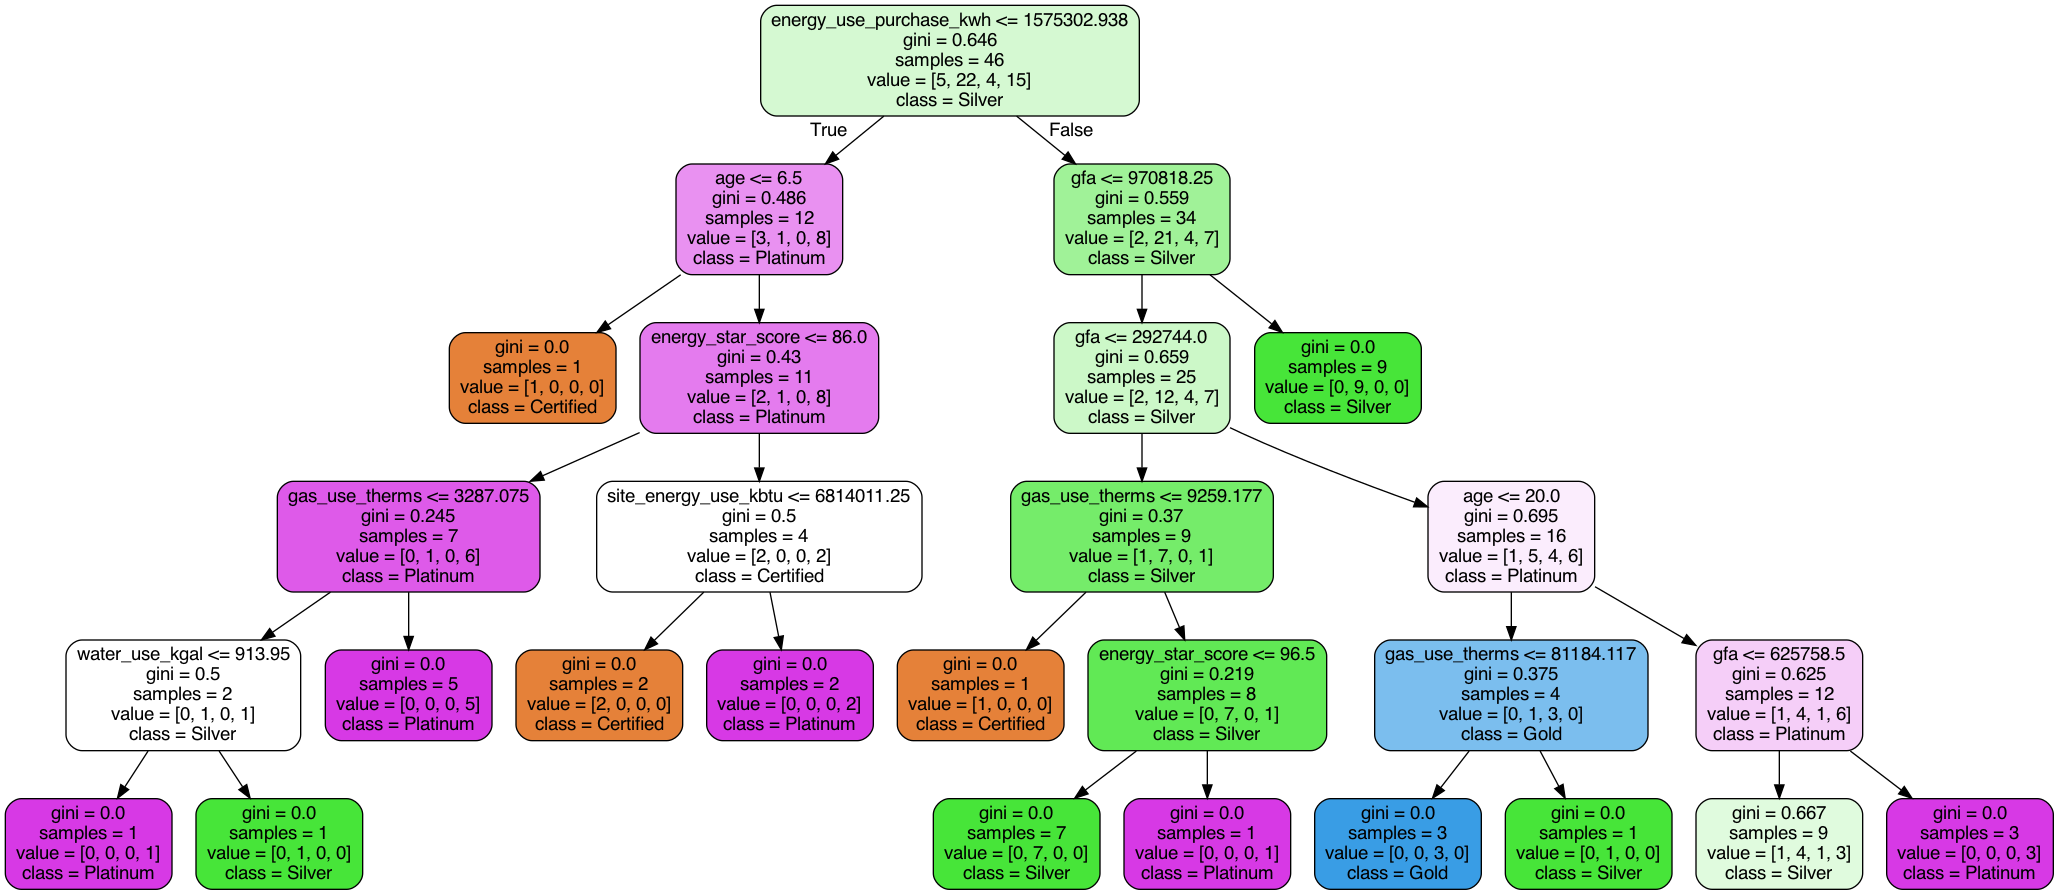

In [37]:
# Export/Print a decision tree in DOT format.
print(tree.export_graphviz(clf_train, None))

#Create Dot Data
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(X_train.columns.values), 
                                class_names=['Certified', 'Silver', 'Gold', 'Platinum'], 
                                rounded=True, filled=True) #Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())